<a href="https://colab.research.google.com/github/gurokeretcha/Fish-Weight-Prediction-Beginners-/blob/main/Fish_Weight_Prediction_(Regression_Analysis_for_beginners)%E2%80%8A_%E2%80%8APart%C2%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Weight Prediction (Regression Analysis for beginners) -   Part 1
Build an ML regression model using the top linear ML algorithms (Linear Regression, Lasso Regression, and Ridge Regression)

## Step 1: Collect the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
data = pd.read_csv("Merah.csv")
data.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0     Mas   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Mas   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Mas   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Mas   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Mas   430.0     26.5     29.0     34.0  12.4440  5.1340

## Step 2: Visualize The data

In [6]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [7]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

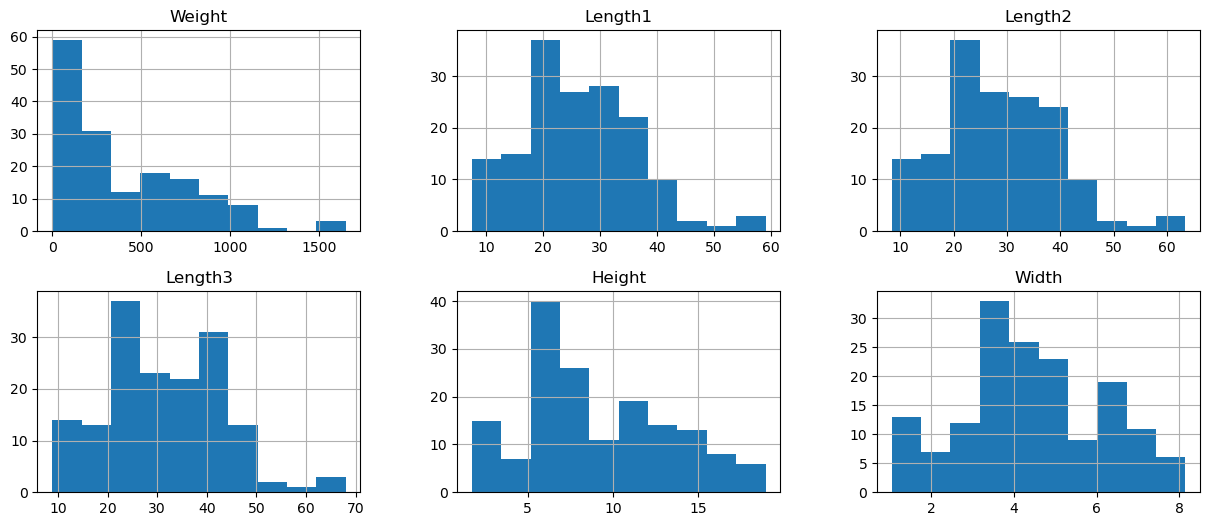

In [9]:
# what is the distribution of the features?
data_num = data.drop(columns=["Species"])

fig, axes = plt.subplots(len(data_num.columns)//3, 3, figsize=(15, 6))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data_num.hist(column = data_num.columns[i], ax=axis)
        i = i+1

c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


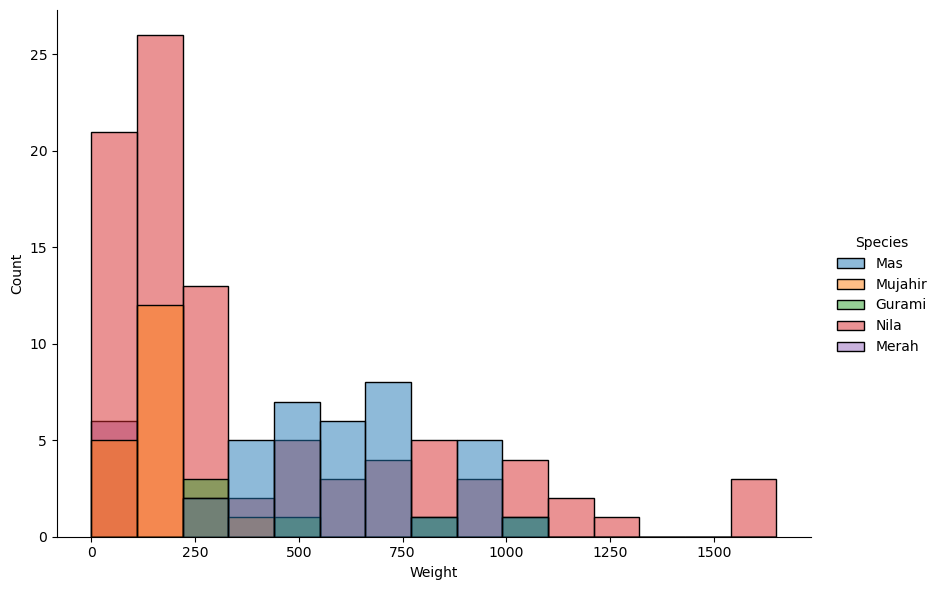

In [8]:
sns.displot(
  data=data,
  x="Weight",
  hue="Species",
  kind="hist",
  height=6,
  aspect=1.4,
  bins=15
)
plt.show()

c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

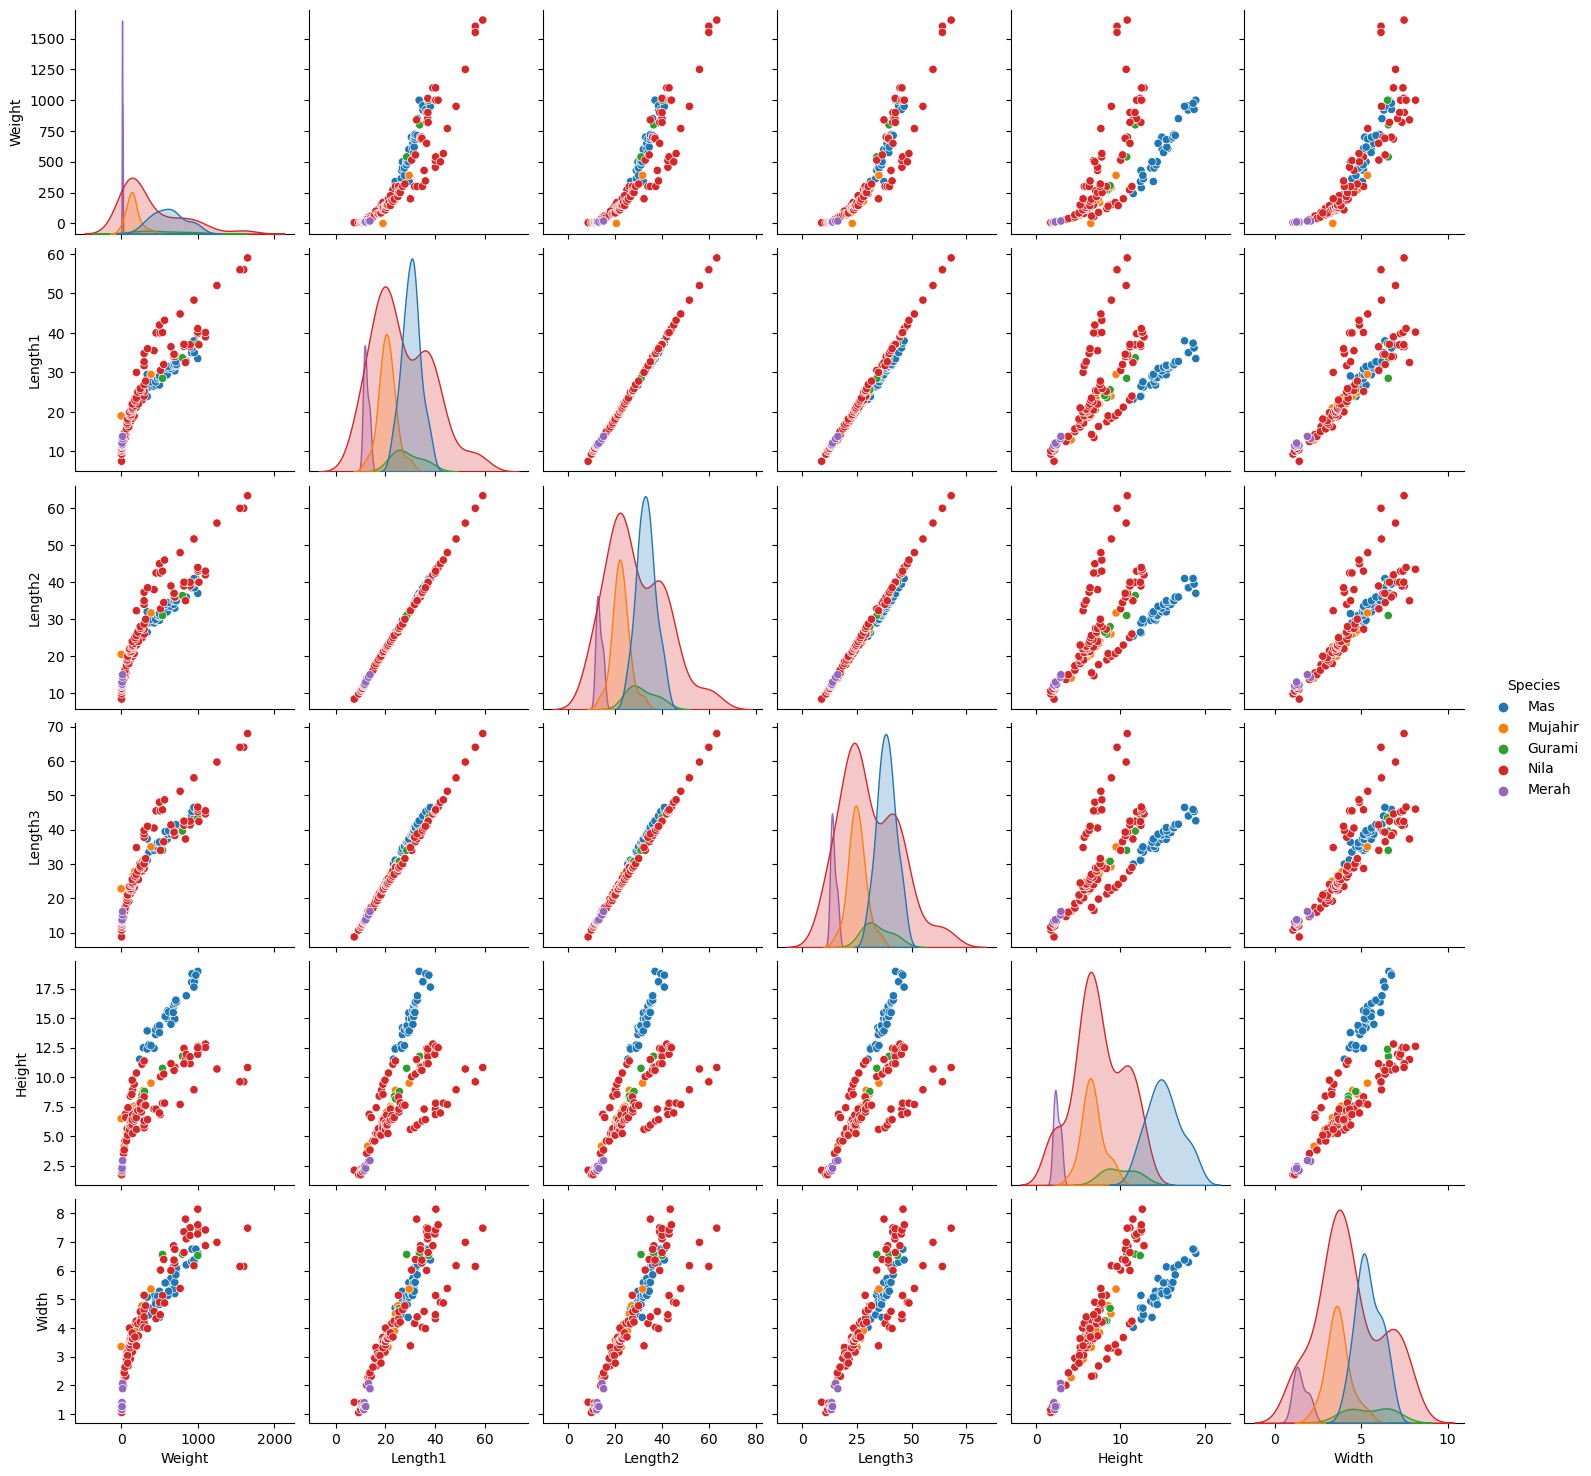

In [10]:
sns.pairplot(data, kind='scatter', hue='Species');

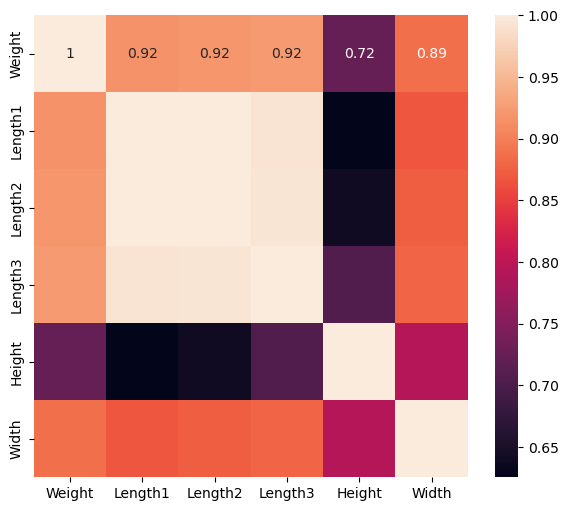

In [11]:
plt.figure(figsize=(7,6))
corr = data_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

In [12]:
data.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0     Mas   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Mas   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Mas   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Mas   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Mas   430.0     26.5     29.0     34.0  12.4440  5.1340

## Step3: Clean the data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ct = make_column_transformer(
    (StandardScaler(),['Length1','Length2','Length3','Height','Width']), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["Species"])
)
#create X and y values
data_cleaned =   data.drop("Weight",axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 6), (32, 6), (127,), (32,))

In [14]:
x_train.head()

Species  Length1  Length2  Length3   Height   Width
75      Nila     15.0     16.2     17.2   4.5924  2.6316
138     Nila     43.2     46.0     48.7   7.7920  4.8700
2        Mas     23.9     26.5     31.1  12.3778  4.6961
86      Nila     20.0     22.0     23.5   6.1100  3.4075
45   Mujahir     20.5     22.5     25.3   7.0334  3.8203

In [15]:
X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
X_test_normal = pd.DataFrame(ct.transform(x_test))

In [16]:
X_train_normal.head()

0         1         2         3         4    5    6    7    8    9
0 -1.130830 -1.148787 -1.220929 -1.062734 -1.104417  0.0  0.0  0.0  0.0  1.0
1  1.709250  1.659079  1.536085 -0.259441  0.270423  0.0  0.0  0.0  0.0  1.0
2 -0.234492 -0.178283 -0.004342  0.891871  0.163613  0.0  1.0  0.0  0.0  0.0
3 -0.627269 -0.602290 -0.669526 -0.681725 -0.627854  0.0  0.0  0.0  0.0  1.0
4 -0.576913 -0.555178 -0.511983 -0.449896 -0.374310  0.0  0.0  0.0  1.0  0.0

## Step 4 Train the model

In [17]:
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
    #model_1
    if model_name=="Linear_Regression":
        reg = LinearRegression()
    #model_2
    elif model_name=="Lasso_Regression":
      reg = Lasso(alpha=0.1,tol=0.03)
        
    #model_3
    elif model_name=="Ridge_Regression":
        reg = Ridge(alpha=1.0)
    else:
        print("please enter correct regressor name")
        
    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)
     
        score_MSE = mean_squared_error(pred, y_val)
        score_MAE = mean_absolute_error(pred, y_val)
        score_r2score = r2_score(pred, y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)

In [18]:
model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
result_scores = []
for model in model_list:
    score = models_score(model,X_train_normal,y_train, X_test_normal,y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Linear_Regression (16111.12, 96.71, 0.88)
Lasso_Regression (16163.26, 97.16, 0.88)
Ridge_Regression (16350.91, 98.86, 0.88)


## Step5: Evaluate

In [19]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

model       mse    mae  r2score
0  Linear_Regression  16111.12  96.71     0.88
1   Lasso_Regression  16163.26  97.16     0.88
2   Ridge_Regression  16350.91  98.86     0.88

## Step6: Parameter Tuning


In [20]:
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 50)
model = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
search = RandomizedSearchCV(model, space, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv,  random_state=1)
result = search.fit(X_train_normal, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -88.81530855821201
Best Hyperparameters: {'alpha': 0.07520580174427169, 'solver': 'lsqr'}


In [21]:
reg = Ridge(alpha=0.24171039031894245, solver ="sag" )
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
score_MSE = mean_squared_error(pred, y_test)
score_MAE = mean_absolute_error(pred, y_test)
score_r2score = r2_score(pred, y_test)
to_append = ["Ridge_hyper_tuned",round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)]
df_result_scores.loc[len(df_result_scores)] = to_append
df_result_scores

model       mse    mae  r2score
0  Linear_Regression  16111.12  96.71     0.88
1   Lasso_Regression  16163.26  97.16     0.88
2   Ridge_Regression  16350.91  98.86     0.88
3  Ridge_hyper_tuned  16365.16  97.77     0.88

## Step7-8: choose best model and make prediction

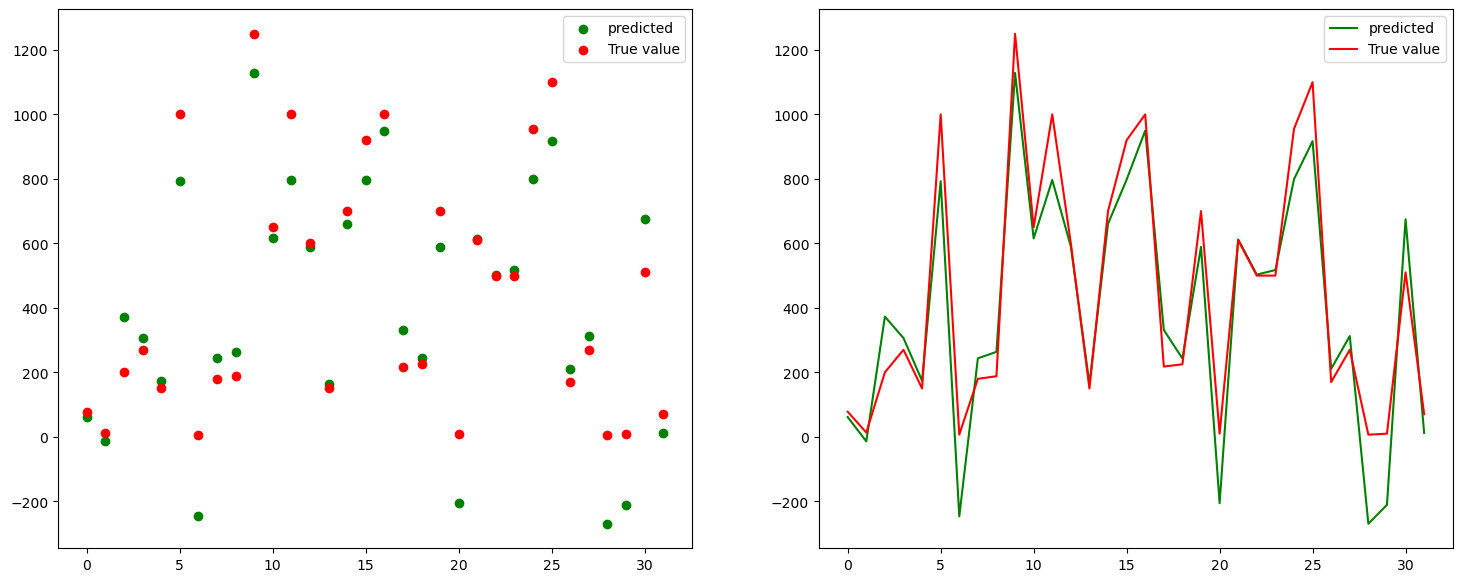

In [22]:
# winner
reg = LinearRegression()
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()